In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# **Dataset Preços de Laptops**

## **Sobre o Dataset**

Este dataset fornece uma coleção abrangente de informações sobre diversos Notebooks, permitindo uma análise detalhada de suas especificações e preços. Ele abrange uma ampla gama de Notebooks, abrangendo diversas marcas, modelos e configurações, tornando-se um recurso valioso para pesquisadores, analistas de dados e entusiastas de aprendizado de máquina interessados ​​no setor de Hardware. O dataset está disponível no [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset/data).

### **Carregando o dataset e realizando análises iniciais**

In [3]:
df_laptops = pd.read_csv('laptops.csv')

df_laptops.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
df_laptops.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


### **1ª Análise: Distribuição de preços dos notebooks com GPUs RTX**

A seguinte análise busca analisar a distribuição dos preços dos notebooks de acordo com o tipo de GPU da série NVIDIA RTX.

Filtrando o dataframe para conter apenas Notebooks que possuam GPU RTX:

In [6]:
df_laptops_rtx = df_laptops[df_laptops['GPU'].fillna('').str.contains('RTX')]

df_laptops_rtx.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.0
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.0
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.0
11,MSI Thin GF63 12VE-021XES Intel Core i7-12650H...,New,MSI,Thin,Intel Core i7,16,1000,SSD,RTX 4050,15.6,No,1399.0
12,ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,16,512,SSD,RTX 3050,15.6,No,1199.0


Gerando o gráfico:

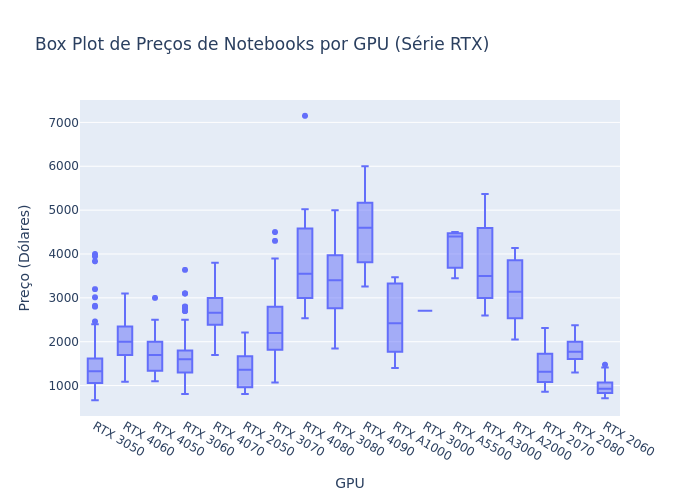

In [7]:
fig1 = px.box(df_laptops_rtx,
             x='GPU',
             y='Final Price',
             title='Box Plot de Preços de Notebooks por GPU (Série RTX)',
             labels={'GPU' : 'GPU',
                     'Final Price' : 'Preço (Dólares)',
                     })

img_bytes = pio.to_image(fig1, format="png")

Image(img_bytes)

Salvando o gráfico como PNG:

In [8]:
fig1.write_image("figura_boxplot_gpu.png")

### **2ª Análise: Distribuição de preços dos notebooks com CPUs Intel**

A seguinte análise busca analisar a distribuição dos preços dos notebooks de acordo com o tipo de CPU da série Intel.

Filtrando o dataframe para conter apenas Notebooks que possuam CPU Intel:

In [9]:
df_laptos_intel = df_laptops[df_laptops['CPU'].fillna('').str.contains('Intel')]

df_laptos_intel.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Gerando o gráfico:

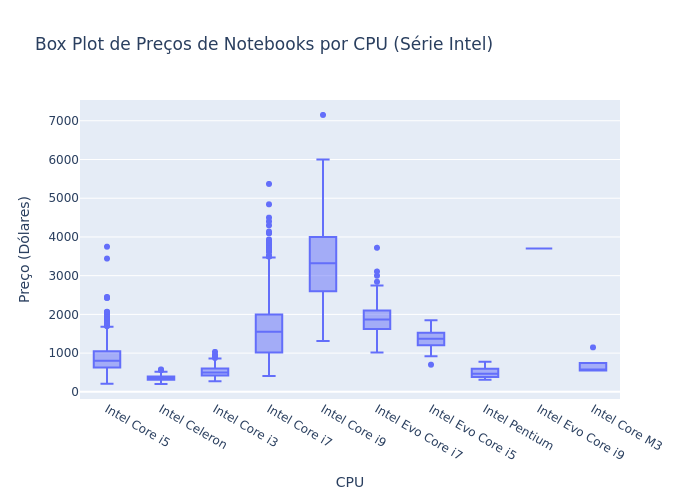

In [10]:
fig2 = px.box(df_laptos_intel,
             x='CPU',
             y='Final Price',
             title='Box Plot de Preços de Notebooks por CPU (Série Intel)',
             labels={'CPU' : 'CPU',
                     'Final Price' : 'Preço (Dólares)',
                     })

img_bytes = pio.to_image(fig2, format="png")

Image(img_bytes)

Salvando o gráfico como PNG:

In [11]:
fig2.write_image("figura_boxplot_CPU.png")

### **3ª Análise: Número de modelos por marca**

A seguinte análise busca analisar a quantidade de modelos diferentes de notebook que cada marca possui.

Contando os valores distintos na coluna Model e gerando novo dataframe apenas com as colunas Brand e Distinct_Count:

In [12]:
distinct_counts = df_laptops.groupby('Brand')['Model'].nunique()

df_distinct_counts = distinct_counts.reset_index()
df_distinct_counts.columns = ['Brand', 'Distinct_Count']

df_distinct_counts.head()

,Brand,Distinct_Count
0,Acer,10
1,Alurin,4
2,Apple,3
3,Asus,20
4,Deep Gaming,1


Gerando o gráfico:

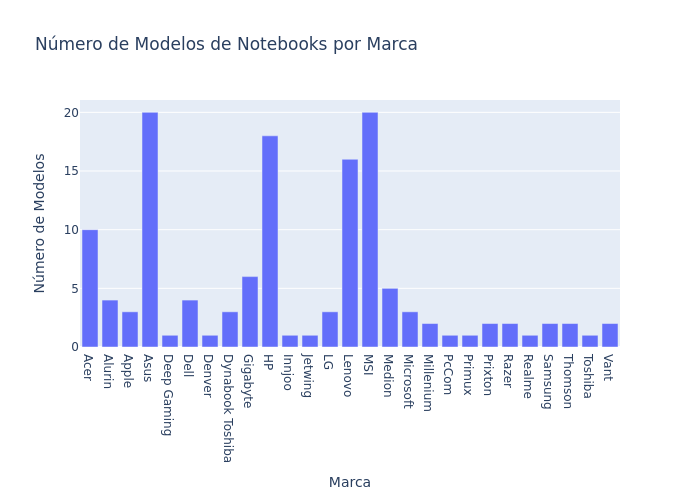

In [13]:
fig3 = px.bar(df_distinct_counts,
             x='Brand',
             y='Distinct_Count',
             title='Número de Modelos de Notebooks por Marca',
             labels={'Brand' : 'Marca',
                     'Distinct_Count' : 'Número de Modelos',
                     })

img_bytes = pio.to_image(fig3, format="png")

Image(img_bytes)

Salvando gráfico como PNG:

In [14]:
fig3.write_image("figura_barchart_brands.png")